In [81]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [82]:
img = cv2.imread("endgame.jpeg")


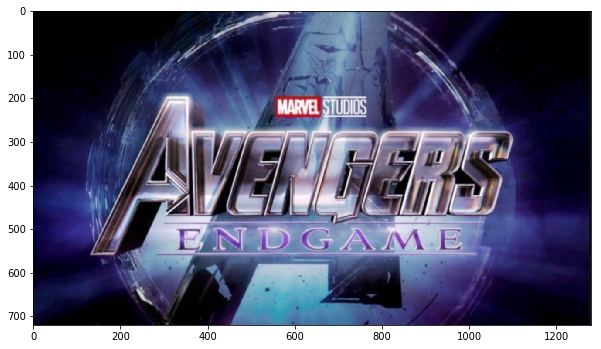

In [83]:
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.axis()
plt.show()

In [90]:
img = cv2.resize(img , dsize = (320,180))

In [92]:
X = img.reshape((-1,3))
print(X.shape)

(57600, 3)


In [93]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 4)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
centers = km.cluster_centers_

In [95]:
print(centers)

[[ 103.18927319  116.77789289  156.19501116]
 [ 177.29976581  180.27043017  203.86848268]
 [  51.1297967    46.92045743   93.70692503]
 [   7.39883957    4.94631822   24.96608331]]


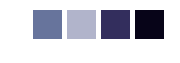

In [96]:
colors = []
for i,color in enumerate(centers):
    plt.subplot(1,10,i+1)
    colors.append(color)
    
    square = np.zeros((100,100,3) , dtype = 'uint8')
    square[:,:,:] = color
    plt.imshow(square)
    plt.axis("off")

In [97]:
np.unique(km.labels_,return_counts = True)

(array([0, 1, 2, 3], dtype=int32), array([12566,  8085, 15737, 21212]))

In [98]:
labels = km.labels_

In [99]:
new_img = np.zeros(X.shape)
for ix in range(X.shape[0]):
    new_img[ix] = colors[labels[ix]]
    
print(new_img.shape)

(57600, 3)


In [100]:
new_img = new_img.reshape(img.shape)

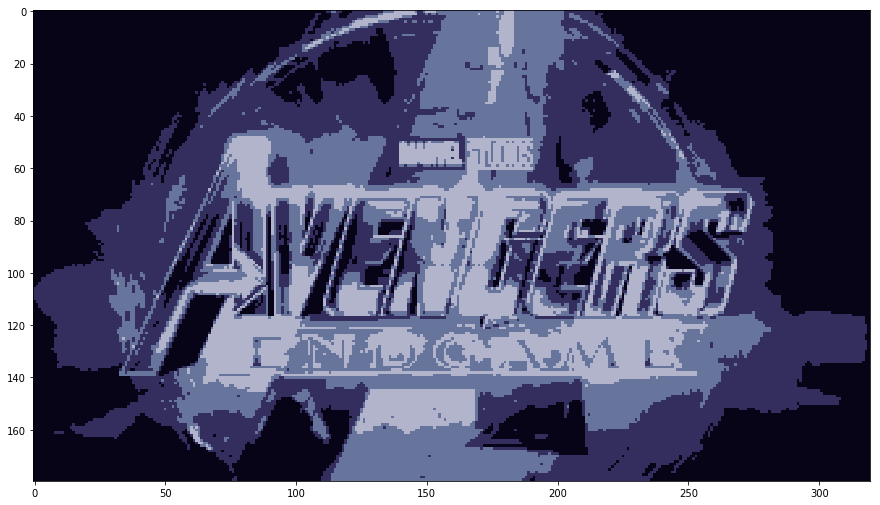

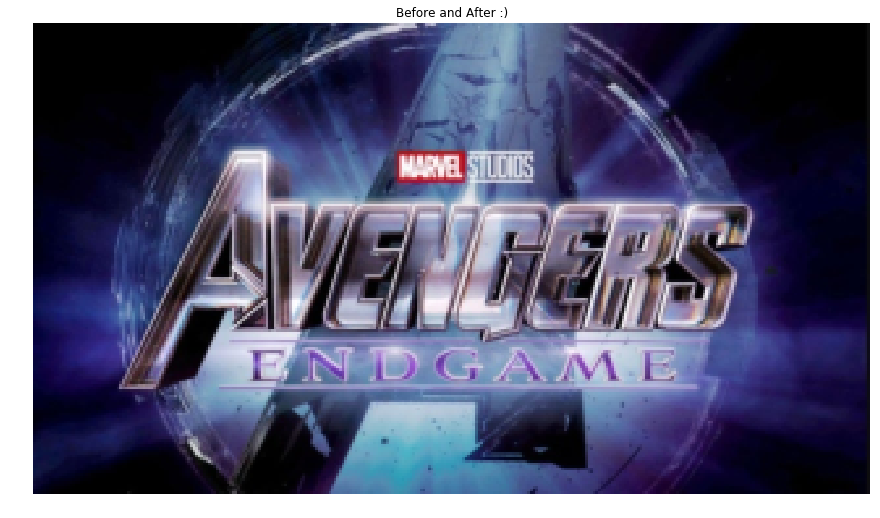

In [101]:
new_img = new_img/255
plt.figure(figsize = (15,15))
plt.imshow(new_img)
plt.show()
plt.figure(figsize = (15,15))
plt.imshow(img)
plt.axis("off")
plt.title("Before and After :)")
plt.show()

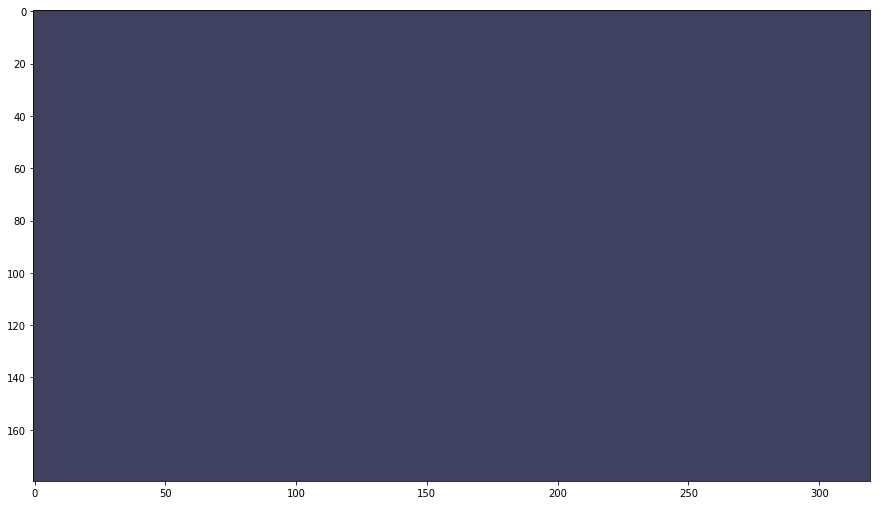

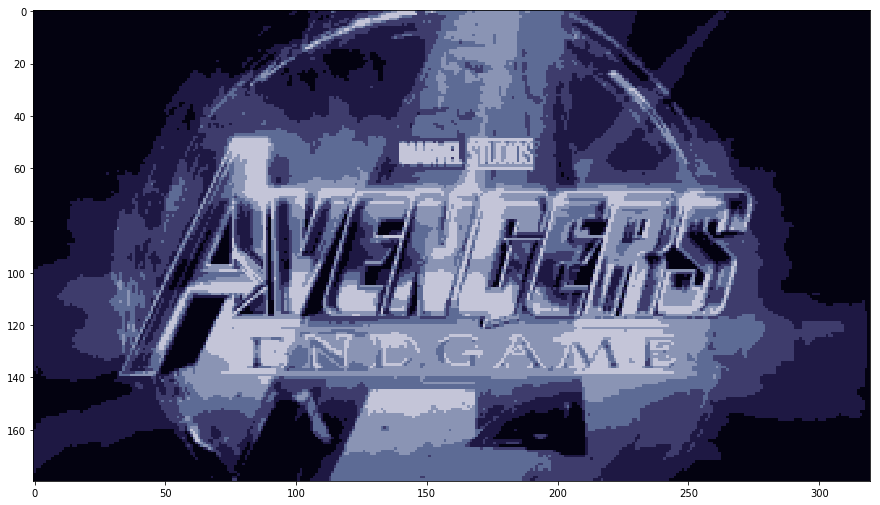

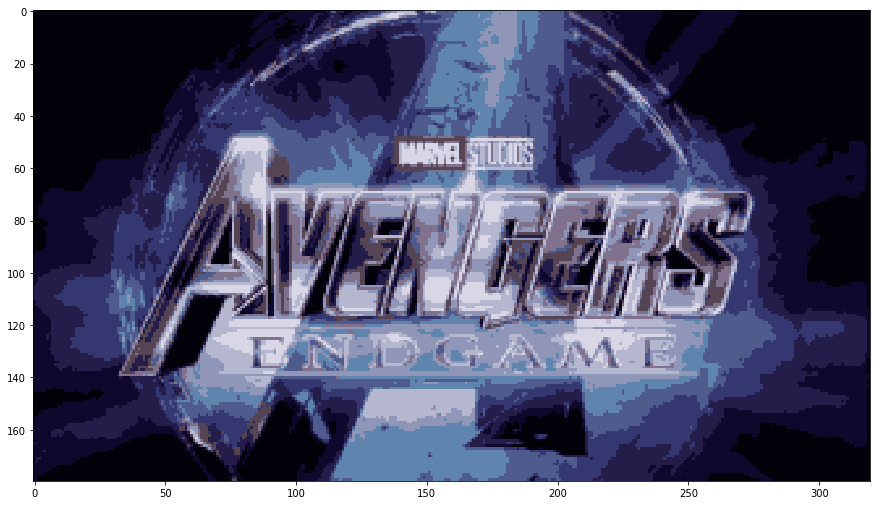

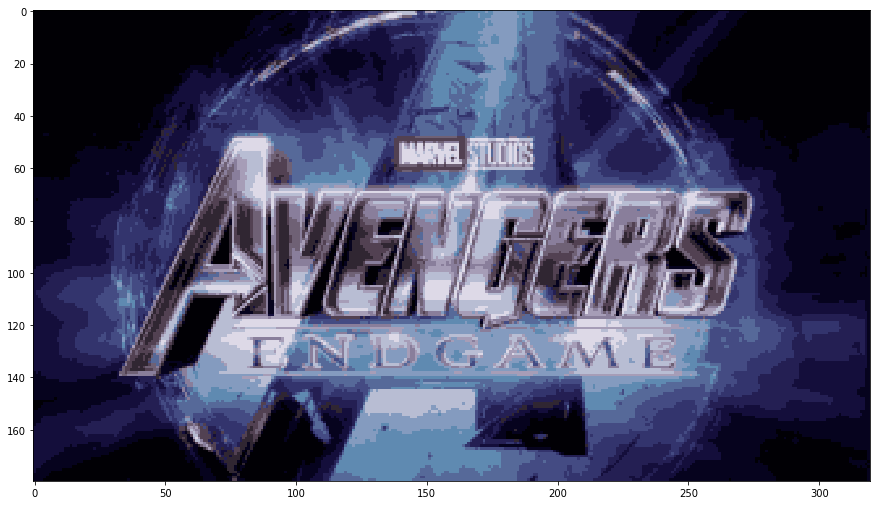

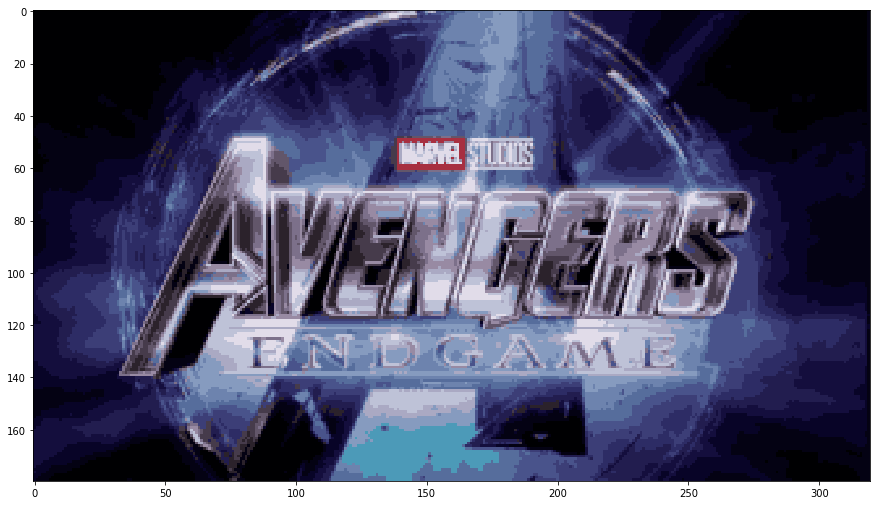

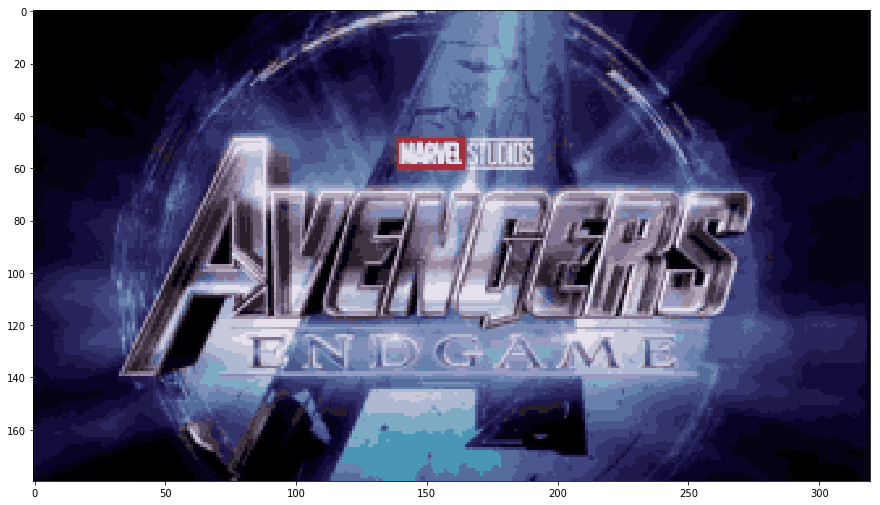

In [103]:
from sklearn.cluster import KMeans

for i in range(1,30,5):
    km = KMeans(n_clusters = i)
    km.fit(X)

    centers = km.cluster_centers_

    colors = []
    for i,color in enumerate(centers):
        colors.append(color)

    labels = km.labels_

    new_img = np.zeros(X.shape)
    for ix in range(X.shape[0]):
        new_img[ix] = colors[labels[ix]]

    new_img = new_img.reshape(img.shape)

    new_img = new_img/255
    plt.figure(figsize = (15,15))
    plt.imshow(new_img)
    plt.show()